In [31]:
#perform EDA Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data=pd.read_csv("EntryPythonAssignments/PythonCapstoneModule/house_price - house_price.csv")
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  int64  
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 722.0+ KB


In [32]:
mean = data['price_per_sqft'].mean()
std = data['price_per_sqft'].std()

# Define bounds
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

# Remove outliers
data1 = data[(data['price_per_sqft'] >= lower_bound) & (data['price_per_sqft'] <= upper_bound)]
data1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13195 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13195 non-null  object 
 1   size            13195 non-null  object 
 2   total_sqft      13195 non-null  float64
 3   bath            13195 non-null  int64  
 4   price           13195 non-null  float64
 5   bhk             13195 non-null  int64  
 6   price_per_sqft  13195 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 824.7+ KB


In [37]:
from scipy.stats import zscore

data['zscore'] = zscore(data['price_per_sqft'])

data2 = data[abs(data['zscore']) <= 3].drop(columns=['zscore'])  # |Z| <= 3
print(data2)


                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0     2   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0     5  120.00    4   
2                   Uttarahalli      3 BHK      1440.0     2   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0     3   95.00    3   
4                      Kothanur      2 BHK      1200.0     2   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0     4  231.00    5   
13196                     other      4 BHK      3600.0     5  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0     2   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0     4  488.00    4   
13199              Doddathoguru      1 BHK       550.0     1   17.00    1   

       price_per_sqft  
0           -0.039554  
1           -0.030971  
2  

In [33]:
# Define bounds using percentiles
lower_bound = data['price_per_sqft'].quantile(0.01)  # 1st percentile
upper_bound = data['price_per_sqft'].quantile(0.99)  # 99th percentile

# Remove outliers
data3 = data[(data['price_per_sqft'] >= lower_bound) & (data['price_per_sqft'] <= upper_bound)]
print(data3)


                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0     2   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0     5  120.00    4   
2                   Uttarahalli      3 BHK      1440.0     2   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0     3   95.00    3   
4                      Kothanur      2 BHK      1200.0     2   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0     4  231.00    5   
13196                     other      4 BHK      3600.0     5  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0     2   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0     4  488.00    4   
13199              Doddathoguru      1 BHK       550.0     1   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2  

In [15]:
# Calculate Q1, Q3, and IQR
import numpy as np
Q1 = data['price_per_sqft'].quantile(0.25)
Q3 = data['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = data[(data['price_per_sqft'] < lower_bound) | (data['price_per_sqft'] > upper_bound)]
print("Outliers (IQR):", outliers)

# Remove outliers (Trimming)
data_trimmed = data[(data['price_per_sqft'] >= lower_bound) & (data['price_per_sqft'] <= upper_bound)]
print("Outliers (IQR):", data_trimmed)

# Capping outliers
data_capped = data.copy()
data_capped['price_per_sqft'] = np.clip(data_capped['price_per_sqft'], lower_bound, upper_bound)


Outliers (IQR):                location       size  total_sqft  bath  price  bhk  \
7          Rajaji Nagar      4 BHK      3300.0     4  600.0    4   
9                 other  6 Bedroom      1020.0     6  370.0    6   
22          Thanisandra  4 Bedroom      2800.0     5  380.0    4   
45           HSR Layout  8 Bedroom       600.0     9  200.0    8   
48             KR Puram  2 Bedroom       800.0     1  130.0    2   
...                 ...        ...         ...   ...    ...  ...   
13142             other      2 BHK      1140.0     1  185.0    2   
13157             other  7 Bedroom      1400.0     7  218.0    7   
13185          Hulimavu      1 BHK       500.0     1  220.0    1   
13186             other  4 Bedroom      1200.0     5  325.0    4   
13191  Ramamurthy Nagar  7 Bedroom      1500.0     9  250.0    7   

       price_per_sqft  
7            0.096143  
9            0.265675  
22           0.052947  
45           0.238118  
48           0.078049  
...               ...  

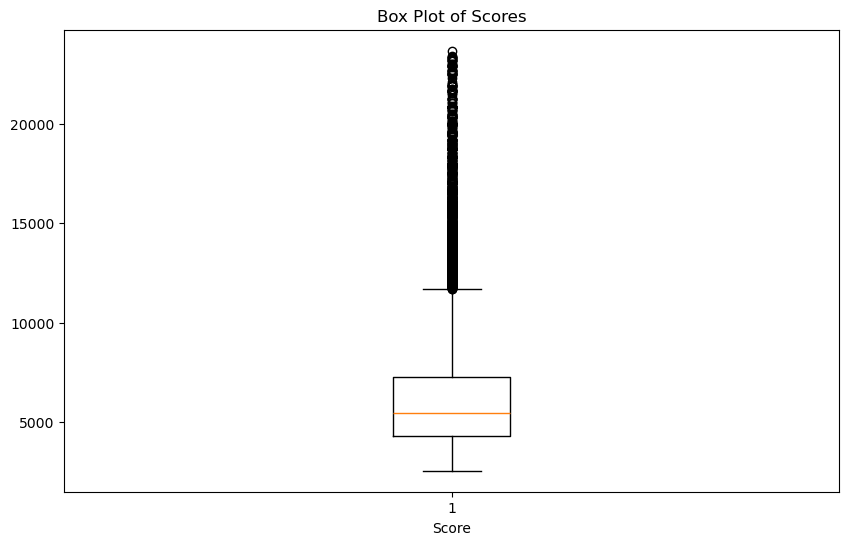

In [34]:
#Box plot
import matplotlib.pyplot as plt
#import seaborn as sns



# Create the box plot
fig=plt.figure(figsize=(10,6))
plt.boxplot(x=data3['price_per_sqft'])
plt.title('Box Plot of Scores')
plt.xlabel('Score')
plt.show()


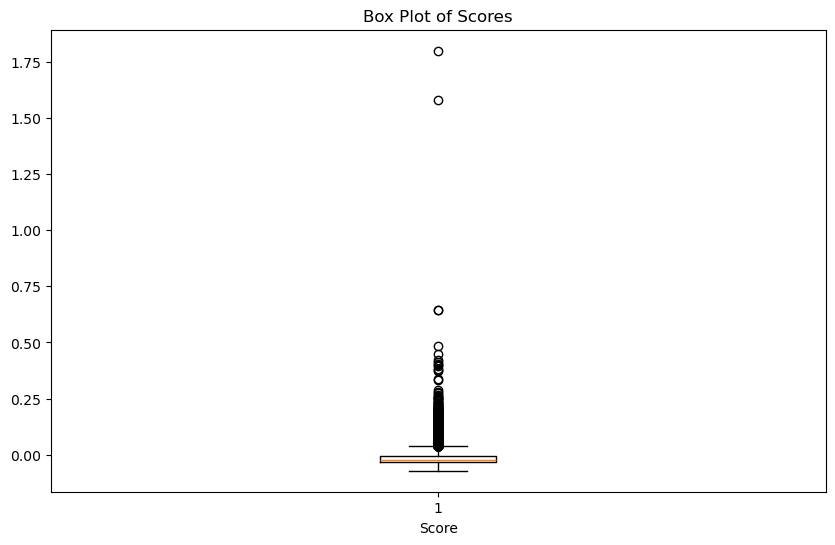

In [40]:
fig=plt.figure(figsize=(10,6))
plt.boxplot(x=data2['price_per_sqft'])
plt.title('Box Plot of Scores')
plt.xlabel('Score')
plt.show()

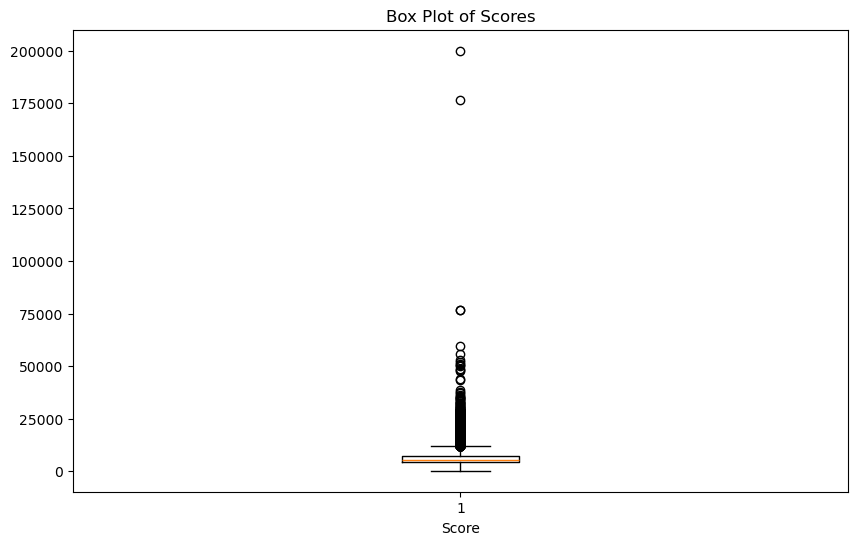

In [35]:
fig=plt.figure(figsize=(10,6))
plt.boxplot(x=data1['price_per_sqft'])
plt.title('Box Plot of Scores')
plt.xlabel('Score')
plt.show()

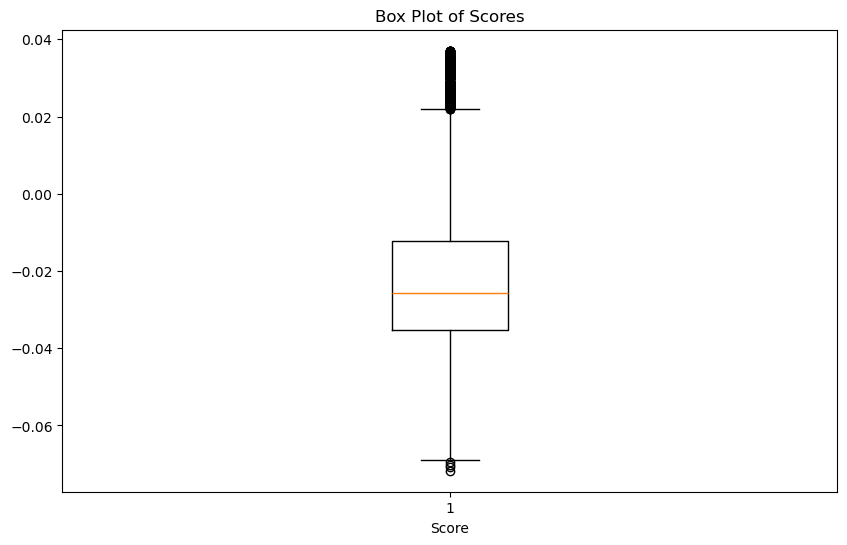

In [42]:
fig=plt.figure(figsize=(10,6))
plt.boxplot(x=data_trimmed['price_per_sqft'])
plt.title('Box Plot of Scores')
plt.xlabel('Score')
plt.show()

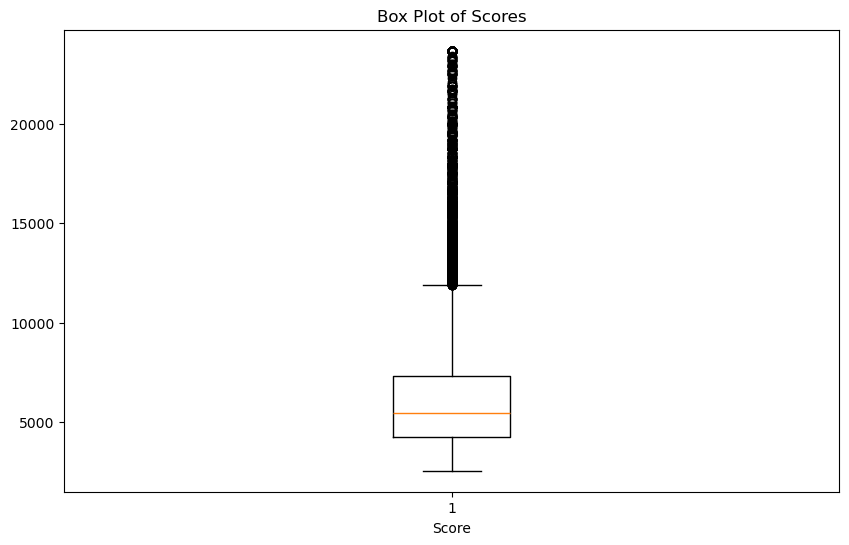

In [36]:
# Capping outliers
data_capped = data.copy()
data_capped['price_per_sqft'] = np.clip(data_capped['price_per_sqft'], lower_bound, upper_bound)
fig=plt.figure(figsize=(10,6))
plt.boxplot(x=data_capped['price_per_sqft'])
plt.title('Box Plot of Scores')
plt.xlabel('Score')
plt.show()


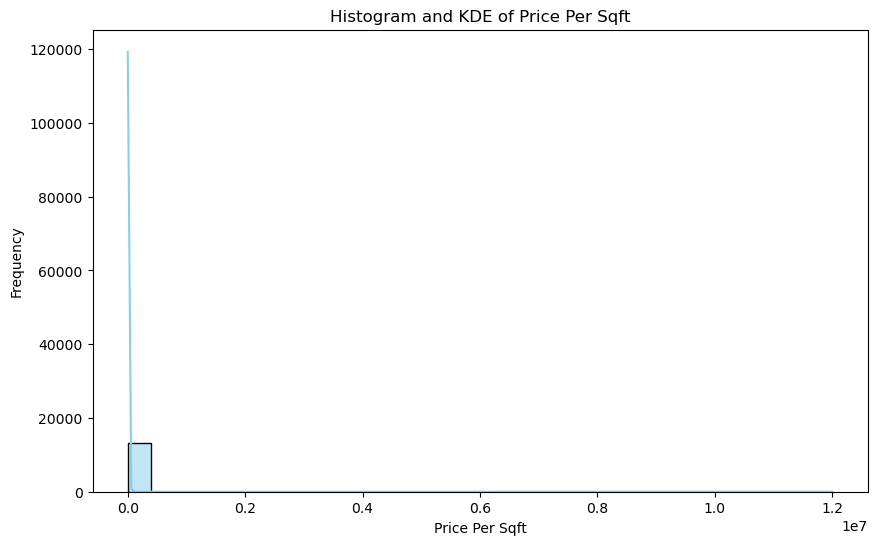

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price_per_sqft'], kde=True, bins=30, color='skyblue')
plt.title('Histogram and KDE of Price Per Sqft')
plt.xlabel('Price Per Sqft')
plt.ylabel('Frequency')
plt.show()

In [43]:
# Skewness and Kurtosis before transformation
skewness_before = data['price_per_sqft'].skew()
kurtosis_before = data['price_per_sqft'].kurtosis()
print(f'Skewness before transformation: {skewness_before}')
print(f'Kurtosis before transformation: {kurtosis_before}')


Skewness before transformation: 108.28105529705168
Kurtosis before transformation: 12095.21502832288


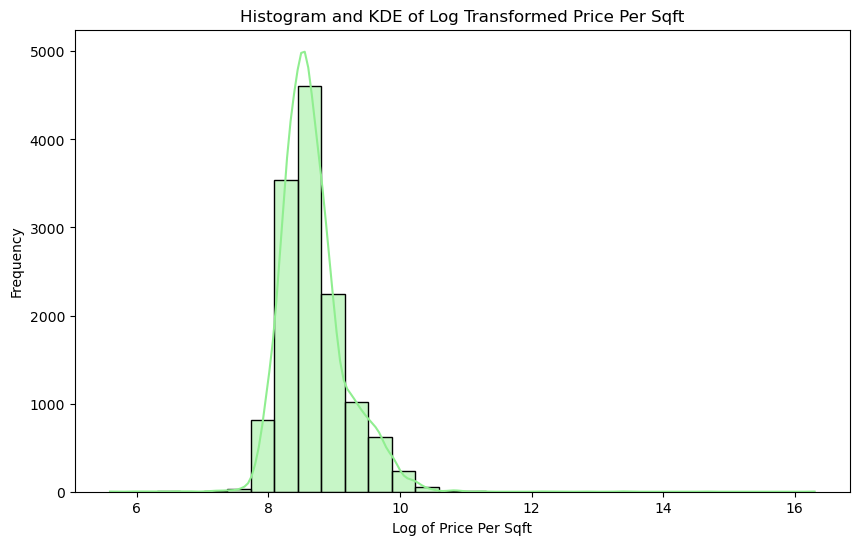

Skewness after transformation: 1.4004850530059296
Kurtosis after transformation: 9.206942162860814


In [46]:
# Apply log transformation
data['log_price_per_sqft'] = np.log1p(data['price_per_sqft'])

# Plot the histogram and KDE for the log-transformed data
plt.figure(figsize=(10, 6))
sns.histplot(data['log_price_per_sqft'], kde=True, bins=30, color='lightgreen')
plt.title('Histogram and KDE of Log Transformed Price Per Sqft')
plt.xlabel('Log of Price Per Sqft')
plt.ylabel('Frequency')
plt.show()

# Check the skewness and kurtosis after log transformation
skewness_after = data['log_price_per_sqft'].skew()
kurtosis_after = data['log_price_per_sqft'].kurtosis()

print(f'Skewness after transformation: {skewness_after}')
print(f'Kurtosis after transformation: {kurtosis_after}')





location               object
size                   object
total_sqft            float64
bath                    int64
price                 float64
bhk                     int64
price_per_sqft          int64
log_price_per_sqft    float64
dtype: object


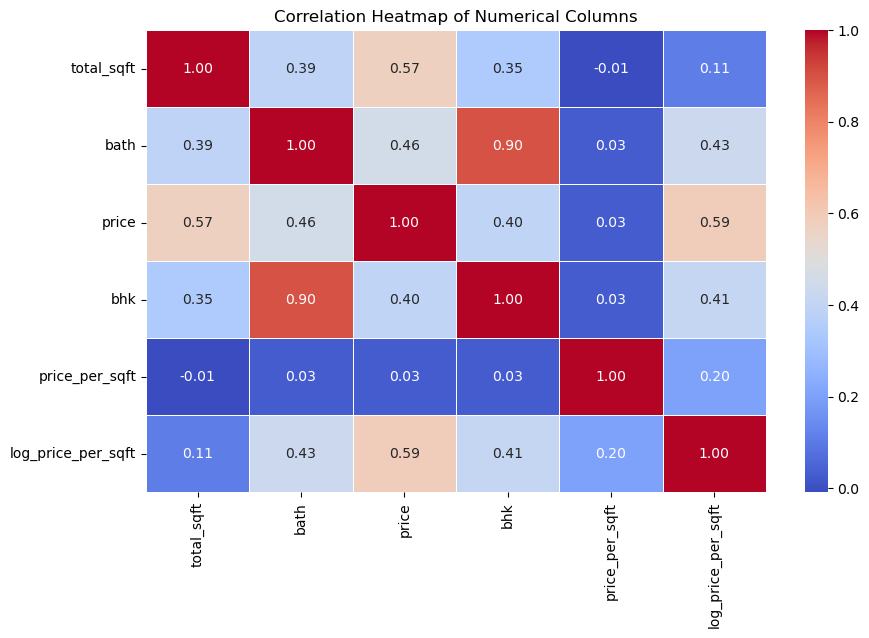

In [49]:
# Check the data types of each column
print(data.dtypes)

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Compute correlation matrix only for numeric columns
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


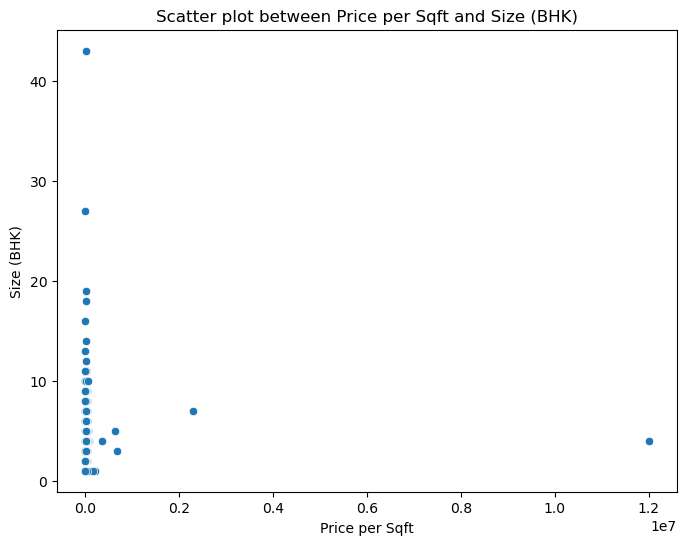

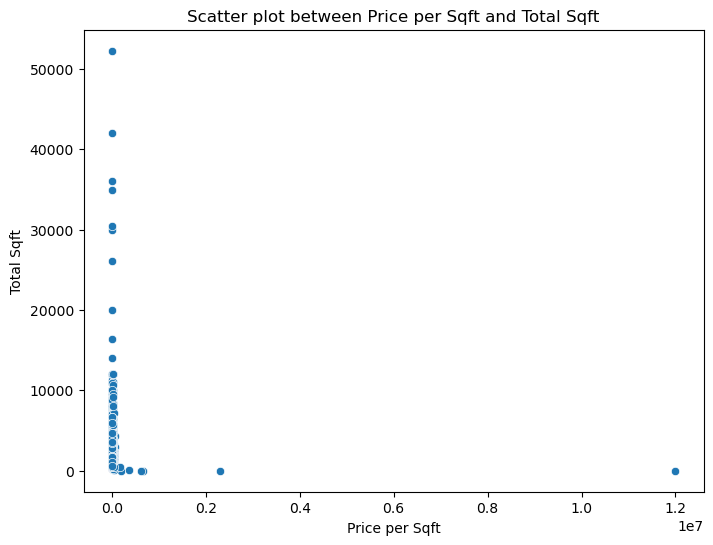

In [63]:



# Scatter plot example: correlation between 'price_per_sqft' and 'size'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['price_per_sqft'], y=data['size'])
plt.title('Scatter plot between Price per Sqft and Size (BHK)')
plt.xlabel('Price per Sqft')
plt.ylabel('Size (BHK)')
plt.show()

# Scatter plot between 'price_per_sqft' and 'total_sqft'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['price_per_sqft'], y=data['total_sqft'])
plt.title('Scatter plot between Price per Sqft and Total Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Total Sqft')
plt.show()


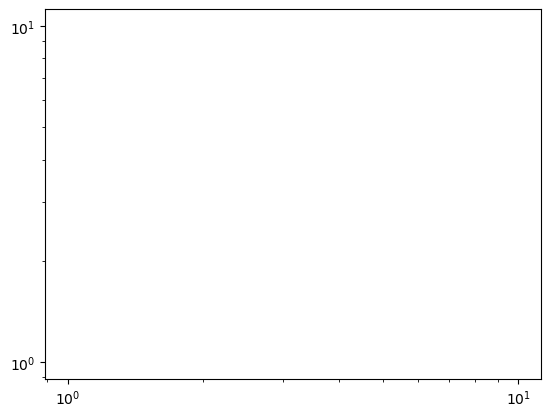

In [61]:
plt.xscale('log')
plt.yscale('log')
